# House Price Pof rediction

## importing tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv(r"/content/drive/MyDrive/ML Intern/New folder (2)/archive (8)/data.csv")
df_out = pd.read_csv(r"/content/drive/MyDrive/ML Intern/New folder (2)/archive (8)/output.csv")

In [3]:
df.head(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Exploratord Data Analysis


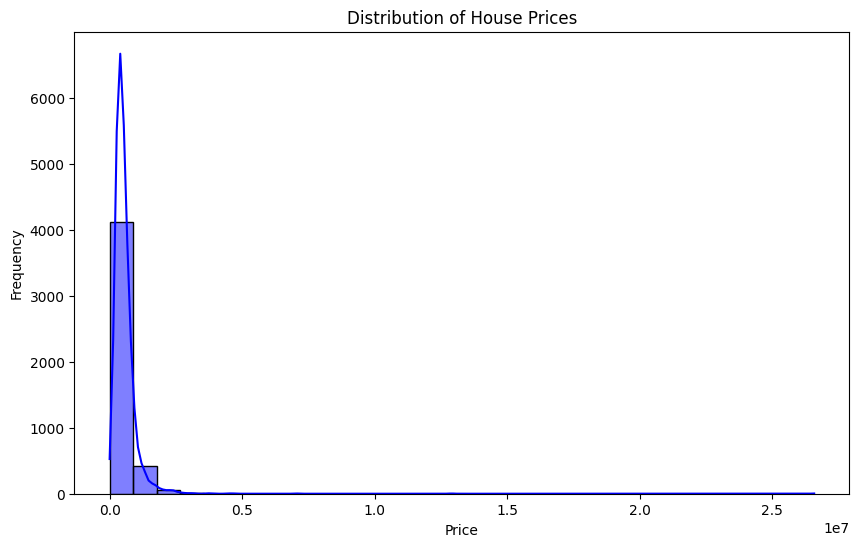

In [7]:
# Distribution of the target variable (house prices)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

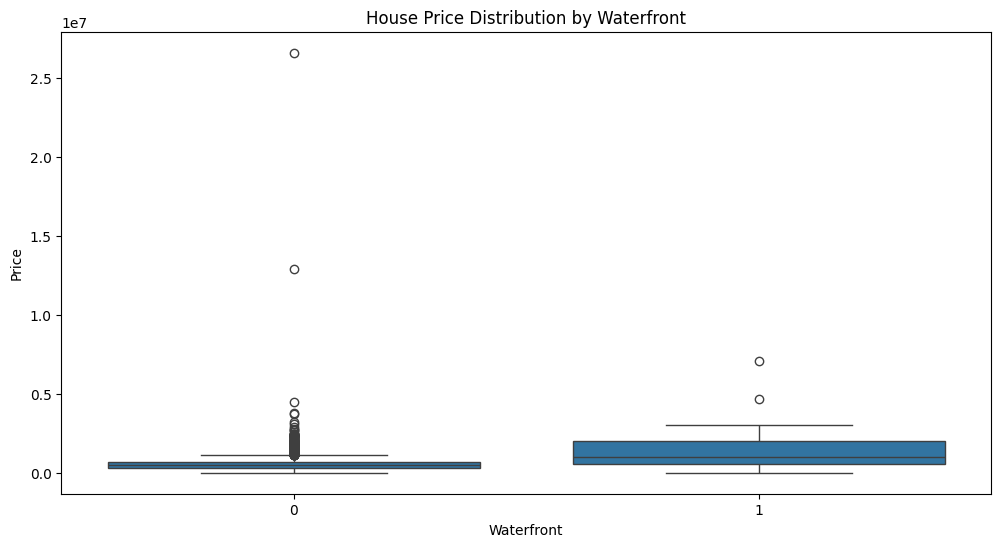

In [10]:
# Boxplot to visualize the distribution of the target variable across categorical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('House Price Distribution by Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()

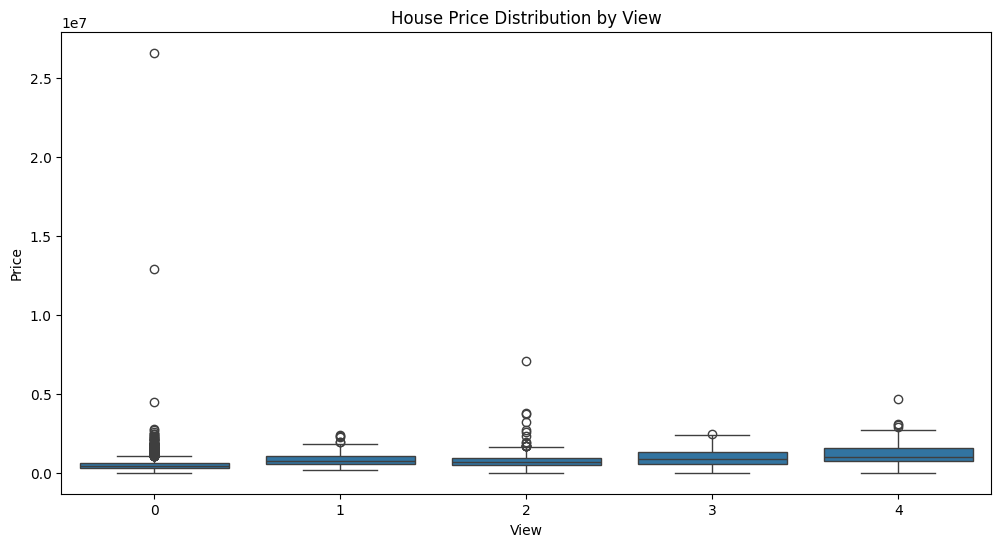

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='view', y='price', data=df)
plt.title('House Price Distribution by View')
plt.xlabel('View')
plt.ylabel('Price')
plt.show()

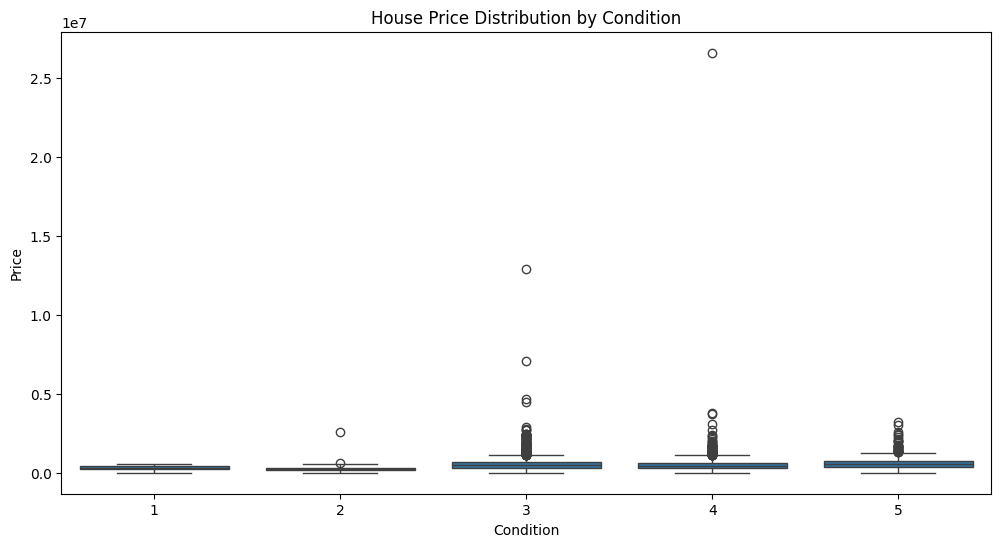

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='condition', y='price', data=df)
plt.title('House Price Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()


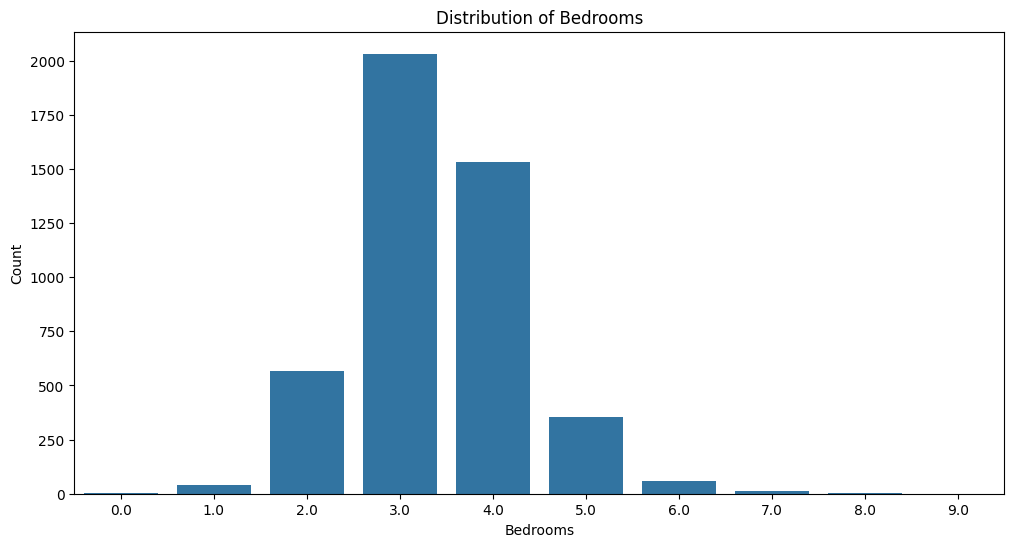

In [14]:
# Distribution of categorical features
plt.figure(figsize=(12, 6))
sns.countplot(x='bedrooms', data=df)
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

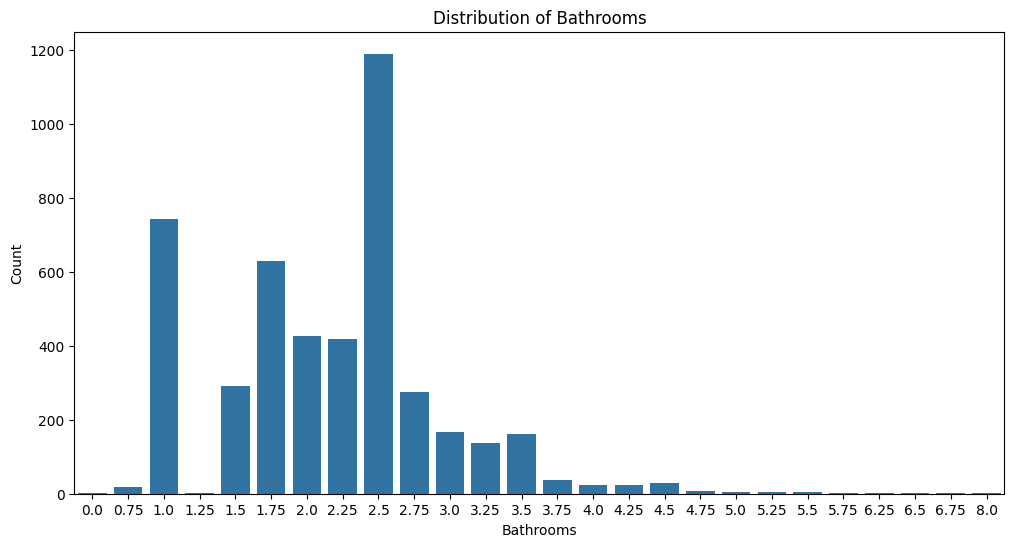

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='bathrooms', data=df)
plt.title('Distribution of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

<ipython-input-8-83c8c64b7cf5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


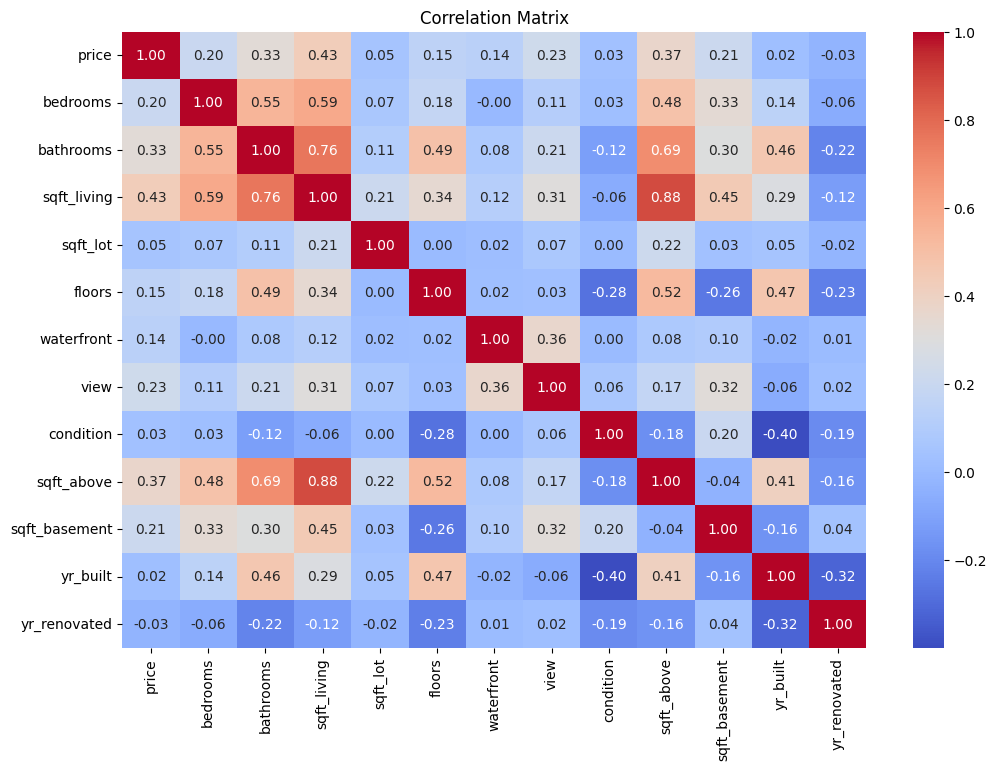

In [8]:
# Correlation matrix to understand the relationships between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

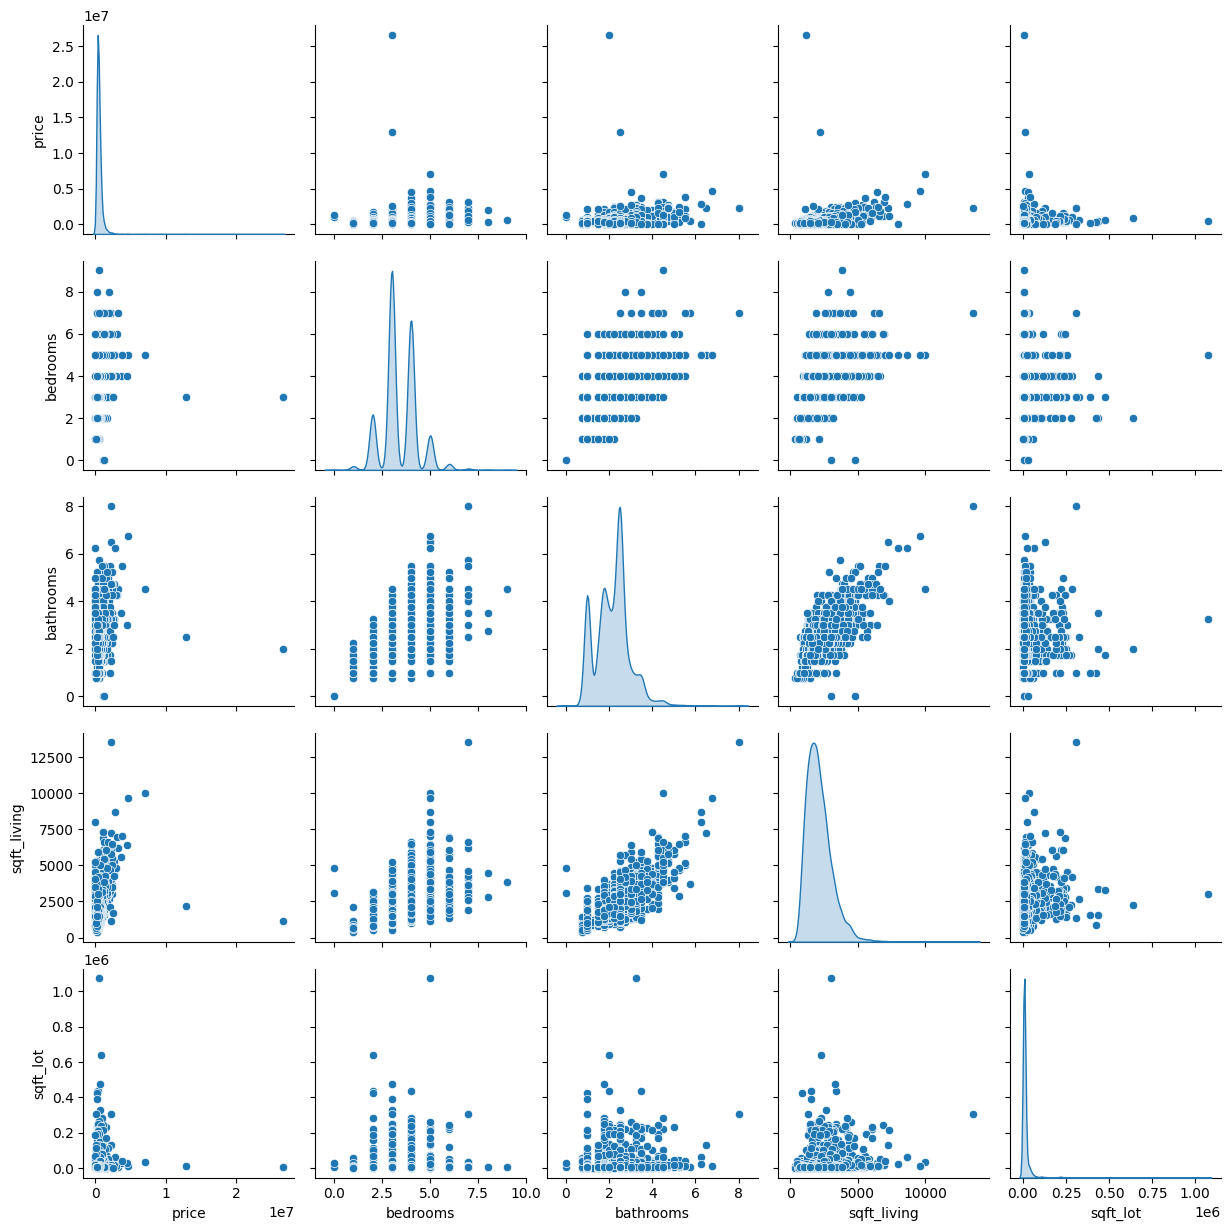

In [17]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df, vars=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], diag_kind='kde')
plt.show()

## Data Preprocessing

In [18]:
# Drop irrelevant columns like 'date', 'street', 'city', 'statezip', 'country'
data = df.drop(columns=['date', 'street', 'city', 'statezip', 'country'])

In [20]:
# Split the dataset into features and target variable
X = data.drop(columns=['price'])
y = data['price']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression

In [22]:
# Initialize Linear Regression model
linear_reg_model = LinearRegression()

In [23]:
# Train the model
linear_reg_model.fit(X_train, y_train)

# Make predictions
linear_reg_predictions = linear_reg_model.predict(X_test)

In [24]:
# Evaluate the model
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_rmse = mean_squared_error(y_test, linear_reg_predictions, squared=False)

print("Linear Regression Results:")
print("MAE:", linear_reg_mae)
print("MSE:", linear_reg_mse)
print("RMSE:", linear_reg_rmse)

Linear Regression Results:
MAE: 210908.17325012176
MSE: 986921767056.1434
RMSE: 993439.3625461714


### Ridge Regression

In [25]:
# Initialize Ridge Regression model
ridge_reg_model = Ridge()


In [26]:
# Train the model
ridge_reg_model.fit(X_train, y_train)

# Make predictions
ridge_reg_predictions = ridge_reg_model.predict(X_test)

In [27]:
# Evaluate the model
ridge_reg_mae = mean_absolute_error(y_test, ridge_reg_predictions)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_predictions)
ridge_reg_rmse = mean_squared_error(y_test, ridge_reg_predictions, squared=False)

print("Ridge Regression Results:")
print("MAE:", ridge_reg_mae)
print("MSE:", ridge_reg_mse)
print("RMSE:", ridge_reg_rmse)

Ridge Regression Results:
MAE: 210931.495390477
MSE: 986897392419.6787
RMSE: 993427.0946675849


### Decision Tree

In [28]:
# Initialize Decision Tree model
decision_tree_model = DecisionTreeRegressor()

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
decision_tree_predictions = decision_tree_model.predict(X_test)

In [29]:
# Evaluate the model
decision_tree_mae = mean_absolute_error(y_test, decision_tree_predictions)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_rmse = mean_squared_error(y_test, decision_tree_predictions, squared=False)

print("Decision Tree Results:")
print("MAE:", decision_tree_mae)
print("MSE:", decision_tree_mse)
print("RMSE:", decision_tree_rmse)

Decision Tree Results:
MAE: 257322.99630937065
MSE: 1027029627428.9279
RMSE: 1013424.7023972367


###Random Forest

In [30]:
# Initialize Random Forest model
random_forest_model = RandomForestRegressor()

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
random_forest_predictions = random_forest_model.predict(X_test)

In [31]:
# Evaluate the model
random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_rmse = mean_squared_error(y_test, random_forest_predictions, squared=False)

print("Random Forest Results:")
print("MAE:", random_forest_mae)
print("MSE:", random_forest_mse)
print("RMSE:", random_forest_rmse)

Random Forest Results:
MAE: 207352.894731546
MSE: 991819263986.9142
RMSE: 995901.2320440789


### Gradient Boosting

In [32]:
# Initialize Gradient Boosting model
gradient_boosting_model = GradientBoostingRegressor()

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Make predictions
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)

In [33]:
# Evaluate the model
gradient_boosting_mae = mean_absolute_error(y_test, gradient_boosting_predictions)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
gradient_boosting_rmse = mean_squared_error(y_test, gradient_boosting_predictions, squared=False)

print("Gradient Boosting Results:")
print("MAE:", gradient_boosting_mae)
print("MSE:", gradient_boosting_mse)
print("RMSE:", gradient_boosting_rmse)

Gradient Boosting Results:
MAE: 202595.30878171668
MSE: 981698439326.9287
RMSE: 990806.9637053065


In [35]:
# Create a function to plot actual vs. predicted prices
def plot_actual_vs_predicted(y_actual, y_predicted, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_predicted, color='blue', alpha=0.5)
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red')
    plt.title(f'Actual vs. Predicted Prices ({model_name})')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.grid(True)
    plt.show()

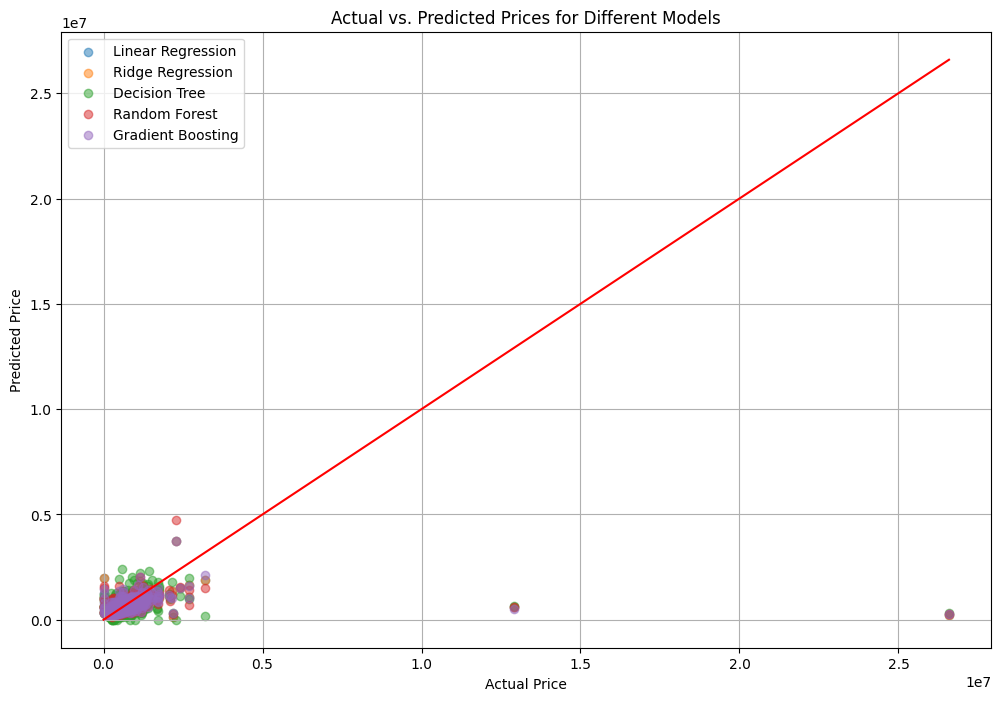

In [42]:
# Actual prices
y_actual = y_test

# Predicted prices for each model
predicted_prices = {
    'Linear Regression': linear_reg_predictions,
    'Ridge Regression': ridge_reg_predictions,
    'Decision Tree': decision_tree_predictions,
    'Random Forest': random_forest_predictions,
    'Gradient Boosting': gradient_boosting_predictions
}

# Plot actual vs. predicted prices for each model
plt.figure(figsize=(12, 8))
for model_name, y_predicted in predicted_prices.items():
    plt.scatter(y_actual, y_predicted, alpha=0.5, label=model_name)

# Plot the diagonal line representing perfect predictions
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red')

plt.title('Actual vs. Predicted Prices for Different Models')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()